In [2]:
#Paquetes necesarios: numpy, matplotlib y astropy
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from astropy.visualization import ZScaleInterval
from astropy.coordinates import SkyCoord

In [3]:
#Abrimos los flats B, estos son de 10 segundos de exposición #### PARA FILTRO B ####
flatB1=fits.open('flats/FLAT_B_B11-001.fit')[0].data
flatB2=fits.open('flats/FLAT_B_B11-002.fit')[0].data
flatB3=fits.open('flats/FLAT_B_B11-003.fit')[0].data
flatB4=fits.open('flats/FLAT_B_B11-004.fit')[0].data
flatB5=fits.open('flats/FLAT_B_B11-005.fit')[0].data
flatB6=fits.open('flats/FLAT_B_B11-006.fit')[0].data
flatB7=fits.open('flats/FLAT_B_B11-007.fit')[0].data
flatB8=fits.open('flats/FLAT_B_B11-008.fit')[0].data
flatB9=fits.open('flats/FLAT_B_B11-009.fit')[0].data
flatB10=fits.open('flats/FLAT_B_B11-010.fit')[0].data

In [4]:
#Abrimos los flats V, estos son de 10 segundos de exposición #### PARA FILTRO V ####
flatV1=fits.open('flats/FLAT_V_B11-001.fit')[0].data
flatV2=fits.open('flats/FLAT_V_B11-001.fit')[0].data
flatV3=fits.open('flats/FLAT_V_B11-003.fit')[0].data
flatV4=fits.open('flats/FLAT_V_B11-004.fit')[0].data
flatV5=fits.open('flats/FLAT_V_B11-005.fit')[0].data
flatV6=fits.open('flats/FLAT_V_B11-006.fit')[0].data
flatV7=fits.open('flats/FLAT_V_B11-007.fit')[0].data
flatV8=fits.open('flats/FLAT_V_B11-008.fit')[0].data
flatV9=fits.open('flats/FLAT_V_B11-009.fit')[0].data
flatV10=fits.open('flats/FLAT_V_B11-010.fit')[0].data

In [11]:
with fits.open('master_bias.fit') as hdul1:
    master_bias = hdul1[0].data
with fits.open('dark_current.fit') as hdul2:
    dark_current = hdul2[0].data   
with fits.open('dark_current_hip277.fit') as hdul3:
    dark_currentHIP1 = hdul3[0].data 
with fits.open('dark_current_hip1101.fit') as hdul4:
    dark_currentHIP2 = hdul4[0].data  

In [6]:
#Generemos un master flatB y normalizemoslo
#Nuestros flats son de 10 segundos de exposición, pero nuestro master dark es de 600, entonces vamos a 
#preferir escalar el dark current a 10 segundo para obtener un master dark de 10 segundos aproximado
master_flatB=np.median([flatB1-master_bias-dark_current*10,flatB2-master_bias-dark_current*10,\
    flatB3-master_bias-dark_current*10,flatB4-master_bias-dark_current*10,flatB5-master_bias-dark_current*10,\
    flatB6-master_bias-dark_current*10,flatB7-master_bias-dark_current*10,flatB8-master_bias-dark_current*10,\
    flatB9-master_bias-dark_current*10,flatB10-master_bias-dark_current*10],axis=0)
master_flatB_norm=master_flatB/np.mean(master_flatB)

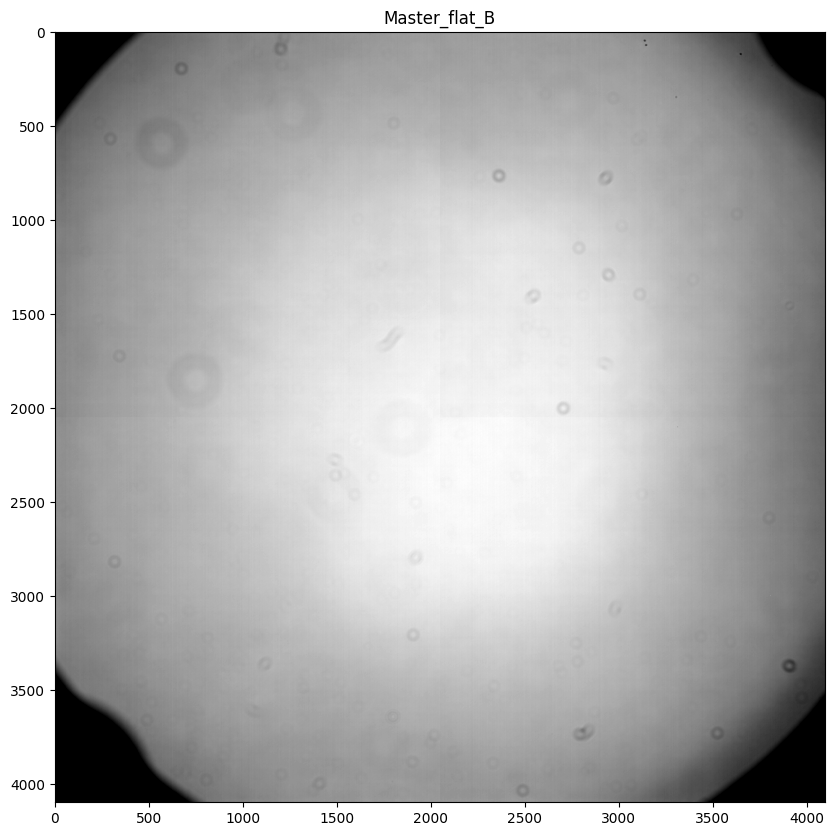

In [7]:
zscale=ZScaleInterval(contrast=0.4)
min_value,max_value=zscale.get_limits(master_flatB_norm)
fig=plt.figure(figsize=(10,10))
plt.imshow(master_flatB_norm,vmin=min_value,vmax=max_value,cmap='gray')
plt.title('Master_flat_B')
plt.savefig('Master_flat_B normalizado')
plt.show()

In [8]:
#Generemos un master flatV y normalizemoslo
#Nuestros flats son de 10 segundos de exposición, pero nuestro master dark es de 600, entonces vamos a 
#preferir escalar el dark current a 10 segundo para obtener un master dark de 10 segundos aproximado
master_flatV=np.median([flatV1-master_bias-dark_current*10,flatV2-master_bias-dark_current*10,\
    flatV3-master_bias-dark_current*10,flatV4-master_bias-dark_current*10,flatV5-master_bias-dark_current*10,\
    flatV6-master_bias-dark_current*10,flatV7-master_bias-dark_current*10,flatV8-master_bias-dark_current*10,\
    flatV9-master_bias-dark_current*10,flatV10-master_bias-dark_current*10],axis=0)
master_flatV_norm=master_flatV/np.mean(master_flatV)

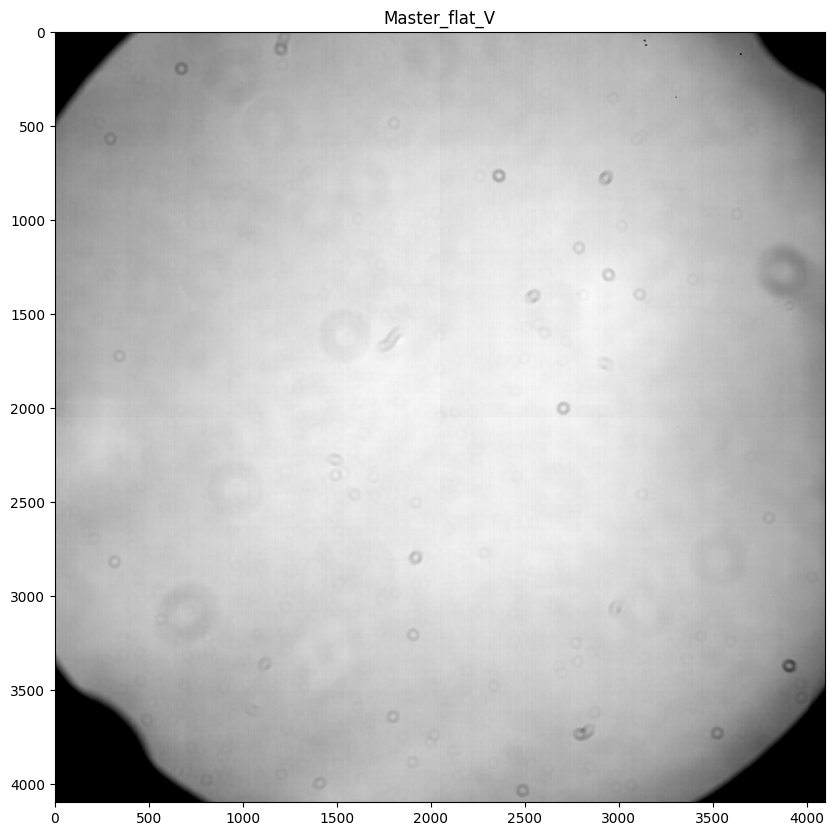

In [9]:
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(master_flatV_norm)
fig=plt.figure(figsize=(10,10))
plt.imshow(master_flatV_norm,vmin=min_value,vmax=max_value,cmap='gray')
plt.title('Master_flat_V')
plt.savefig('Master_flat_V normalizado')
plt.show()

In [10]:
hdu = fits.PrimaryHDU(master_flatB_norm)
hdu.writeto('master_flatB_norm.fit', overwrite=True)

hdu = fits.PrimaryHDU(master_flatV_norm)
hdu.writeto('master_flatV_norm.fit', overwrite=True)

## Master Flats HIP 277

In [ ]:
master_flatB_HIP1=np.median([flatB1-master_bias-dark_currentHIP1*10,flatB2-master_bias-dark_currentHIP1*10,\
    flatB3-master_bias-dark_currentHIP1*10,flatB4-master_bias-dark_currentHIP1*10,flatB5-master_bias-dark_currentHIP1*10,\
    flatB6-master_bias-dark_currentHIP1*10,flatB7-master_bias-dark_currentHIP1*10,flatB8-master_bias-dark_currentHIP1*10,\
    flatB9-master_bias-dark_currentHIP1*10,flatB10-master_bias-dark_currentHIP1*10],axis=0)
master_flatB_HIP1_norm=master_flatB_HIP1/np.mean(master_flatB_HIP1)

master_flatV_HIP1=np.median([flatV1-master_bias-dark_currentHIP1*10,flatV2-master_bias-dark_currentHIP1*10,\
    flatV3-master_bias-dark_currentHIP1*10,flatV4-master_bias-dark_currentHIP1*10,flatV5-master_bias-dark_currentHIP1*10,\
    flatV6-master_bias-dark_currentHIP1*10,flatV7-master_bias-dark_currentHIP1*10,flatV8-master_bias-dark_currentHIP1*10,\
    flatV9-master_bias-dark_currentHIP1*10,flatV10-master_bias-dark_currentHIP1*10],axis=0)
master_flatV_HIP1_norm=master_flatV_HIP1/np.mean(master_flatV_HIP1)

In [14]:
hdu = fits.PrimaryHDU(master_flatB_HIP1_norm)
hdu.writeto('master_flatB_hip277_norm.fit', overwrite=True)

hdu = fits.PrimaryHDU(master_flatV_HIP1_norm)
hdu.writeto('master_flatV_hip277_norm.fit', overwrite=True)

## Master Flats HIP1101

In [15]:
master_flatB_HIP2=np.median([flatB1-master_bias-dark_currentHIP2*10,flatB2-master_bias-dark_currentHIP2*10,\
    flatB3-master_bias-dark_currentHIP2*10,flatB4-master_bias-dark_currentHIP2*10,flatB5-master_bias-dark_currentHIP2*10,\
    flatB6-master_bias-dark_currentHIP2*10,flatB7-master_bias-dark_currentHIP2*10,flatB8-master_bias-dark_currentHIP2*10,\
    flatB9-master_bias-dark_currentHIP2*10,flatB10-master_bias-dark_currentHIP2*10],axis=0)
master_flatB_HIP2_norm=master_flatB_HIP2/np.mean(master_flatB_HIP2)

master_flatV_HIP2=np.median([flatV1-master_bias-dark_currentHIP2*10,flatV2-master_bias-dark_currentHIP2*10,\
    flatV3-master_bias-dark_currentHIP2*10,flatV4-master_bias-dark_currentHIP2*10,flatV5-master_bias-dark_currentHIP2*10,\
    flatV6-master_bias-dark_currentHIP2*10,flatV7-master_bias-dark_currentHIP2*10,flatV8-master_bias-dark_currentHIP2*10,\
    flatV9-master_bias-dark_currentHIP2*10,flatV10-master_bias-dark_currentHIP2*10],axis=0)
master_flatV_HIP2_norm=master_flatV_HIP2/np.mean(master_flatV_HIP2)

In [16]:
hdu = fits.PrimaryHDU(master_flatB_HIP2_norm)
hdu.writeto('master_flatB_hip1101_norm.fit', overwrite=True)

hdu = fits.PrimaryHDU(master_flatV_HIP2_norm)
hdu.writeto('master_flatV_hip1101_norm.fit', overwrite=True)